In [1]:
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
ber = pd.read_csv(r'E:\ber_results.csv')

In [3]:
bra = pd.read_csv('results_exp_2_bra/0full_results1.csv')

## joint plot

In [12]:
parameters = {'axes.labelsize': 15,'xtick.labelsize':15,'ytick.labelsize':15,"axes.labelweight":'normal'}
plt.rcParams.update(parameters)

<Figure size 720x720 with 0 Axes>

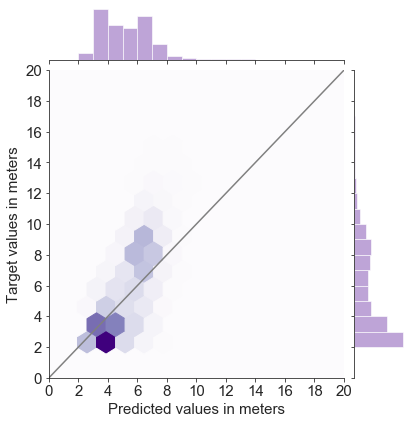

In [50]:
fig = plt.figure(figsize=(10,10))
g = sns.JointGrid(bra_1.y_predict, bra_1.y_valid,xlim=(0, 20), ylim=(0, 20))
g.plot_joint(plt.hexbin,  cmap="Purples", 
             gridsize=50, 
             extent=[0, np.max(bra_1.y_predict), 0, np.max(bra_1.y_predict)]
             )

g.ax_joint.plot([0,20], [0,20], color = 'grey', linewidth=1.5)

_ = g.ax_marg_x.hist(bra_1.y_predict, color="tab:purple", alpha=.6,
                       bins=np.arange(0, 20, 1))

_ = g.ax_marg_y.hist(bra_1.y_valid, color="tab:purple", alpha=.6,
                       orientation="horizontal",
                       bins=np.arange(0, 20, 1))

g.set_axis_labels('Predicted values in meters','Target values in meters')

plt.xticks(np.arange(0, 22, 2))
plt.yticks(np.arange(0, 22, 2))
plt.savefig('Fig4-A.png',dpi=600)

In [6]:
fig = plt.figure(figsize=(10,10))
sns.set_style("ticks")
g = sns.JointGrid(ber.y_predict, ber.y_valid,xlim=(0, 20), ylim=(0, 20))
g.plot_joint(plt.hexbin,  cmap="Purples", 
             gridsize=24, 
             extent=[0, np.max(ber.y_predict), 0, np.max(ber.y_predict)]
             )

g.ax_joint.plot([0,20], [0,20], color = 'grey', linewidth=1.5)

_ = g.ax_marg_x.hist(ber.y_predict, color="tab:purple", alpha=.6,
                       bins=np.arange(0, 20, 1))

_ = g.ax_marg_y.hist(ber.y_valid, color="tab:purple", alpha=.6,
                       orientation="horizontal",
                       bins=np.arange(0, 20, 1))

g.set_axis_labels('Predicted values in meters','Target values in meters')

plt.xticks(np.arange(0, 22, 2))
plt.yticks(np.arange(0, 22, 2))
plt.savefig('Fig4-B.png',dpi=600)

C:\Users\miln\AppData\Local\Continuum\anaconda3\envs\carto_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

## violin plot

In [8]:
ber_1 = pd.read_csv(r'E:\\ber_sample_results.csv')

In [4]:
bra_1 = pd.read_csv('results_exp_2_bra/253full_results.csv')

In [9]:
parameters = {'axes.labelsize': 30,'xtick.labelsize':30,'ytick.labelsize':30,"axes.labelweight":'normal'}

plt.rcParams.update(parameters)

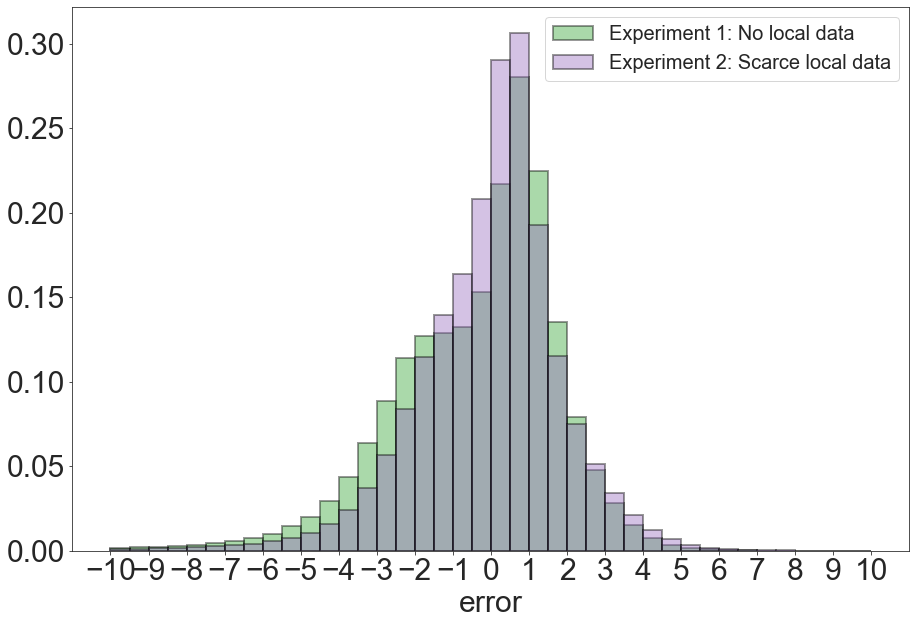

In [21]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(bra_1['error'],
    hist=True,kde=False,bins=np.linspace(-10,10,41),hist_kws=dict(edgecolor="k", linewidth=2),
    color = "tab:green",
    label='Experiment 1: No local data',norm_hist=True)

sns.distplot(bra['error'],
    hist=True,kde=False,bins=np.linspace(-10,10,41),hist_kws=dict(edgecolor="k", linewidth=2),
    color = "tab:purple",
    label='Experiment 2: Scarce local data',norm_hist=True)

plt.xticks(np.arange(-10,11, 1.0))

plt.legend(prop={'size': 20})
plt.savefig('Fig4-E.svg')

In [11]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(ber['error'],
    hist=True,kde=False,bins=np.linspace(-10,10,41),hist_kws=dict(edgecolor="k", linewidth=2),
    color = "tab:green",
    label='Experiment 1: No local data',norm_hist=True)

sns.distplot(ber_1['error'],
    hist=True,kde=False,bins=np.linspace(-10,10,41),hist_kws=dict(edgecolor="k", linewidth=2),
    color = "tab:purple",
    label='Experiment 2: Scarce local data',norm_hist=True)

plt.xticks(np.arange(-10,11, 1.0))
ax.set_ylim(0, 0.3)

plt.legend(prop={'size': 20})
plt.savefig('Fig4-F.svg')

## violin plot

In [5]:
conds = [bra.y_valid.between(0,4.99),bra.y_valid.between(5,9.99),
         bra.y_valid.between(10,14.99),bra.y_valid.between(15,np.inf)]
choices = ['(0,5]','(5,10]','(10,15]','(15,inf[']
bra['range'] = np.select(conds,choices,4)

In [6]:
conds = [bra_1.y_valid.between(0,4.99),bra_1.y_valid.between(5,9.99),
         bra_1.y_valid.between(10,14.99),bra_1.y_valid.between(15,np.inf)]
choices = ['(2,5]','(5,10]','(10,15]','(15,inf[']
bra_1['range'] = np.select(conds,choices,4)

In [14]:
conds = [ber.y_valid.between(0,4.99),ber.y_valid.between(5,9.99),
         ber.y_valid.between(10,14.99),ber.y_valid.between(15,np.inf)]
choices = ['(0,5]','(5,10]','(10,15]','(15,inf[']
ber['range'] = np.select(conds,choices,4)

In [15]:
conds = [ber_1.y_valid.between(0,4.99),ber_1.y_valid.between(5,9.99),
         ber_1.y_valid.between(10,14.99),ber_1.y_valid.between(15,np.inf)]
choices = ['(0,5]','(5,10]','(10,15]','(15,inf[']
ber_1['range'] = np.select(conds,choices,4)

In [16]:
parameters = {'axes.labelsize': 30,'xtick.labelsize':30,'ytick.labelsize':30,"axes.labelweight":'normal'}

plt.rcParams.update(parameters)

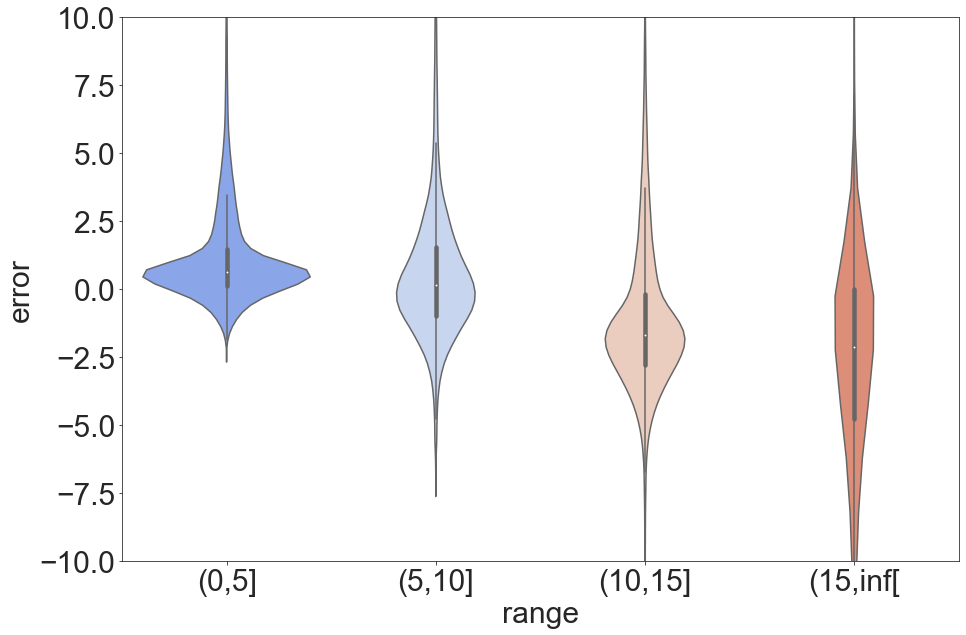

In [17]:
fig, ax = plt.subplots(figsize=(15,10))

sns.violinplot(x="range", y="error", data=ber_1,
               order=['(0,5]','(5,10]','(10,15]','(15,inf['],
               palette='coolwarm',
               linewidth=1.5)

ax.set_ylim(-10, 10)
plt.savefig('Fig4-D.svg')

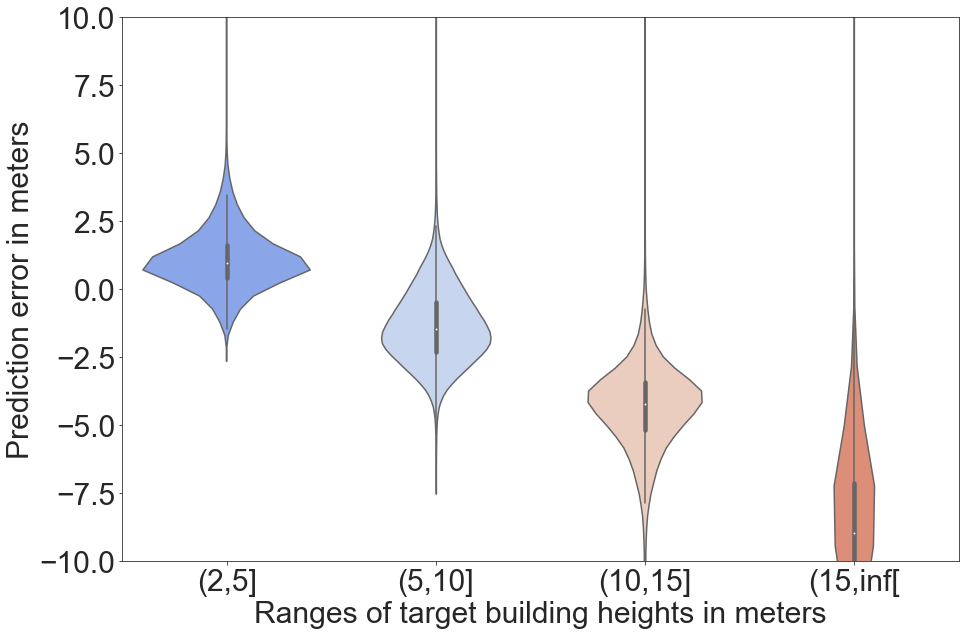

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

sns.violinplot(x="range", y="error", data=bra_1,
               order=['(2,5]','(5,10]','(10,15]','(15,inf['],
               palette='coolwarm',
               linewidth=1.5)

ax.set_ylim(-10, 10)
ax.set(xlabel='Ranges of target building heights in meters', ylabel='Prediction error in meters')
plt.savefig('Fig4-C.svg')